In [1]:
from harmonic_piezo_truss import *
import numpy as np
import matplotlib.pyplot as plt
import tqdm 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

In [2]:
# Create a harmonic piezo-solid truss structure with 3 nodes on each edge, 
# and the frequency of the harmonic excitation is 10 rad*Hz, and the damping ratio is 0.8
harm_piezo_truss = HarmonicPiezoTruss(node_num_4_each_edge=8, m=1e-6, omega=10, xi=.2, k=1e4, path='./')
# Add voltage to the piezo-solid truss structure
harm_piezo_truss.add_harmVolForce(V=10+0j, reset=True, seed=0)
# 
lr = 1e8
Epoch = 50000
desired = [1e-6+1e-6*1j,0]
loss = []

for _ in tqdm.tqdm(range(Epoch)):
    # Free vibration
    harm_piezo_truss.add_extDisps(nodes=[0, 1], disps=[[0, 0], [np.nan+1j*np.nan, 0]], reset=True)
    harm_piezo_truss.linearSolve()
    Q_free = harm_piezo_truss.calc_dynamical_Q()
    loss += [np.linalg.norm(harm_piezo_truss.calDisps[-1]-desired)/ np.linalg.norm(desired)]
    
    # Forced vibration
    harm_piezo_truss.add_extDisps(nodes=[0, 1, -1], disps=[[0, 0], [np.nan+1j*np.nan, 0], desired], reset=True)
    harm_piezo_truss.linearSolve()
    Q_forced = harm_piezo_truss.calc_dynamical_Q()
    
    # Update the voltage
    harm_piezo_truss.extVoltage += lr * (Q_forced - Q_free)
    harm_piezo_truss.add_harmVolForce(reset=True)


  0%|          | 70/50000 [00:00<01:11, 698.64it/s]

100%|██████████| 50000/50000 [01:08<00:00, 728.59it/s]


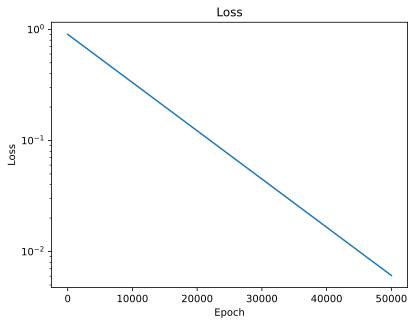

In [3]:
# Plot the loss 
plt.figure()
plt.semilogy(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()


In [4]:
harm_piezo_truss.add_extDisps(nodes=[0, 1], disps=[[0, 0], [np.nan+1j*np.nan, 0]], reset=True)
harm_piezo_truss.linearSolve()
print(harm_piezo_truss.calDisps[-1])
    

[9.95858227e-07+9.93262805e-07j 3.39828091e-09+5.43907705e-13j]


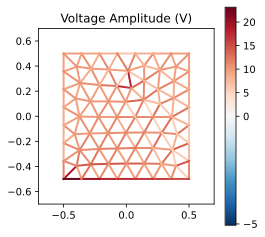

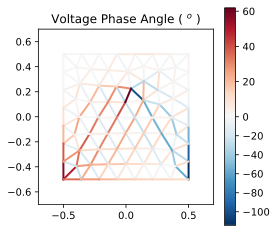

In [5]:
# Plot the voltage distribution
harm_piezo_truss.plot_harmVoltage()

In [6]:
harm_piezo_truss.add_sinXYDeform(angle=45)

In [7]:
# Create a harmonic piezo-solid truss structure with 3 nodes on each edge, 
# and the frequency of the harmonic excitation is 10 rad*Hz, and the damping ratio is 0.8
harm_piezo_truss = HarmonicPiezoTruss(node_num_4_each_edge=8, m=1e-6, omega=10, xi=.2, k=1e4, path='./')
# Add voltage to the piezo-solid truss structure
harm_piezo_truss.add_harmVolForce(V=10+0j, reset=True, seed=0)
# 
lr = 1e9
Epoch = 50000
harm_piezo_truss.add_sinXYDeform(angle=45)
desired = harm_piezo_truss.extDisps.copy()
num_slice = 4 * harm_piezo_truss.nn4ee - 4

loss = []
# 
for _ in tqdm.tqdm(range(Epoch)):
    # Free vibration
    harm_piezo_truss.add_extDisps(nodes=[0, 1], disps=[[0, 0], [np.nan+1j*np.nan, 0]], reset=True)
    harm_piezo_truss.linearSolve()
    Q_free = harm_piezo_truss.calc_dynamical_Q()
    loss += [np.linalg.norm(harm_piezo_truss.calDisps[:num_slice]-desired[:num_slice])/ np.linalg.norm(desired[:num_slice])]

    # Forced vibration
    harm_piezo_truss.extDisps = desired.copy()
    harm_piezo_truss.linearSolve()
    Q_forced = harm_piezo_truss.calc_dynamical_Q()

    # Update the voltage
    harm_piezo_truss.extVoltage += lr * (Q_forced - Q_free)
    harm_piezo_truss.add_harmVolForce(reset=True)


  0%|          | 88/50000 [00:00<00:57, 873.87it/s]

100%|██████████| 50000/50000 [00:57<00:00, 869.36it/s]


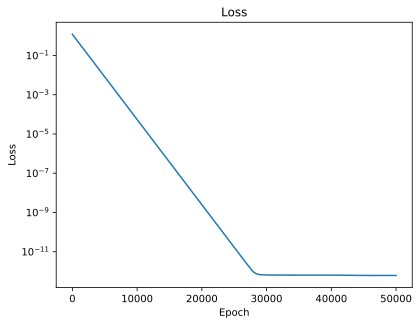

In [8]:
# Plot the loss 
plt.figure()
plt.semilogy(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [9]:
harm_piezo_truss.add_extDisps(nodes=[0, 1], disps=[[0, 0], [np.nan+1j*np.nan, 0]], reset=True)
harm_piezo_truss.linearSolve()
print(harm_piezo_truss.calDisps[4])
print(desired[4])

[ 3.97046694e-21+1.52201233e-22j -3.06802134e-07-3.06802134e-07j]
[ 0.00000000e+00+0.00000000e+00j -3.06802134e-07-3.06802134e-07j]
